## Rescue false negatives with JLOE method using binwise FDRs calculated for all colon cell lines with saturation modeling


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import scipy.stats as stats
import glob as glob
import scipy.cluster.hierarchy as clust
import scipy.stats as stats
import os as os
rcParams['pdf.fonttype']=42
rcParams['font.size']=16

In [3]:
avana20q2=pd.read_table('../../Avana20Q2_data_with_CCLE_IDs.txt', sep="\t", index_col=0)
avana20q2.head()

,CALU1_LUNG,HUCCT1_BILIARY_TRACT,KMRC20_KIDNEY,253J_URINARY_TRACT,RAJI_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HCC2429_LUNG,YD38_UPPER_AERODIGESTIVE_TRACT,MHHNB11_AUTONOMIC_GANGLIA,ESS1_ENDOMETRIUM,TFK1_BILIARY_TRACT,...,UACC257_SKIN,AU565_BREAST,HEC1_ENDOMETRIUM,MEC1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH522_LUNG,DOTC24510_CERVIX,MERO82_PLEURA,MEL290_UVEA,ICC106_BILIARY_TRACT,PECAPJ41CLONED2_UPPER_AERODIGESTIVE_TRACT
A1BG,-22.015,-16.591,-21.307,-15.856,-16.258,-14.497,-15.352,-18.578,-10.537,-25.080,...,-3.556,-8.869,-19.276,-17.635,-2.854,-26.693,-9.323,-25.026,-26.251,-17.701
A1CF,-47.060,-18.895,-26.172,-12.448,-17.446,-8.172,-11.898,-24.322,-16.476,-34.396,...,-8.674,-13.703,-20.240,-22.125,-8.422,-25.009,-7.187,-20.434,-24.472,-11.012
A2M,-19.829,-11.047,-17.706,-8.766,-15.336,-8.104,-10.438,-7.648,-16.074,-23.963,...,-4.219,-2.800,-19.603,-18.759,-4.591,-26.254,-4.848,-26.913,-21.061,-8.956
A2ML1,-28.154,-23.691,-25.717,-15.747,-23.090,-9.030,-11.832,-16.182,-23.864,-30.493,...,-8.031,-16.233,-22.813,-9.454,-6.728,-35.078,-6.486,-21.051,-31.189,-16.949
A3GALT2,-32.328,-31.929,-26.826,-11.024,-21.150,-12.258,-15.324,-24.551,-18.677,-28.148,...,-9.354,-20.133,-17.622,-14.150,-9.620,-26.834,-3.331,-16.657,-28.814,-12.737


In [4]:
colon_cells=list()
for i in avana20q2.columns:
    if i.split("_",1)[1]=='LARGE_INTESTINE':
        colon_cells.append(i)

In [5]:
len(colon_cells)

25

In [6]:
bf_df=avana20q2[colon_cells]

In [7]:
bf_df.head()

,COLO678_LARGE_INTESTINE,OUMS23_LARGE_INTESTINE,HT29_LARGE_INTESTINE,SNU1033_LARGE_INTESTINE,T84_LARGE_INTESTINE,KM12_LARGE_INTESTINE,MDST8_LARGE_INTESTINE,COLO201_LARGE_INTESTINE,SNUC4_LARGE_INTESTINE,C2BBE1_LARGE_INTESTINE,...,HCC56_LARGE_INTESTINE,SW1463_LARGE_INTESTINE,SNU503_LARGE_INTESTINE,SW620_LARGE_INTESTINE,NCIH716_LARGE_INTESTINE,SW837_LARGE_INTESTINE,RKO_LARGE_INTESTINE,LS180_LARGE_INTESTINE,LS513_LARGE_INTESTINE,HT55_LARGE_INTESTINE
A1BG,-22.885,-19.106,-26.310,-10.319,-16.687,-22.810,-11.765,-18.616,-15.337,-27.551,...,-22.543,-25.825,-29.007,-31.195,-19.853,-40.040,-31.583,-9.318,-13.199,-14.223
A1CF,-22.358,-12.737,-24.598,-6.914,-21.507,-22.684,-17.015,-25.102,-13.781,-18.185,...,-36.212,-13.990,-34.869,-37.899,-19.972,-32.696,-32.435,-16.298,-9.772,-23.475
A2M,-21.388,-1.687,-7.028,-2.991,-14.021,-12.172,-9.149,-15.138,-6.140,-24.100,...,-8.205,-27.108,-16.694,-19.232,-11.309,-16.219,-21.317,-8.913,-10.945,-14.363
A2ML1,-40.426,-15.232,-21.822,-11.550,-18.802,-6.233,-13.751,-24.187,-21.477,-26.096,...,-28.601,-28.143,-29.931,-35.523,-13.559,-29.166,-28.552,-12.976,-15.437,-32.142
A3GALT2,-25.862,-10.039,-27.583,5.767,-20.688,-30.857,-7.484,-22.259,-16.027,-41.809,...,-34.630,-25.198,-48.841,-41.095,-25.350,-57.357,-37.558,-14.043,-16.384,-30.812


In [8]:
from sklearn.utils import resample
from tqdm import tqdm

In [10]:
screens=dict() #cell line dictionary for each iteration
gene_bf_dict_100=dict() #ranked bagel bf dictionary for each gene per iteration

for i in tqdm(range(100)):
    screens[i]=pd.Series(bf_df.columns.values).sample(replace=False, n=8).values #chosen cell line
    gene_bf_dict_100[i]=dict()
    bf_chosen_screen= bf_df[screens[i]] # for the chosen screens, the bf table
    for j in bf_chosen_screen.index:
        gene_df=pd.DataFrame(index=bf_chosen_screen.loc[j].sort_values(ascending=False).index, columns=['BF_BAGEL'])
        gene_df['BF_BAGEL']=bf_chosen_screen.loc[j].sort_values(ascending=False).values
        gene_bf_dict_100[i][j]=gene_df
    

100%|██████████| 100/100 [24:00<00:00, 14.41s/it]


In [11]:
pd.DataFrame(screens).to_csv("./JLOE_cell_lines_per_iteration_colon_bootstrap_BF10_avana20q2.txt", sep="\t")

In [12]:
gene_bf_dict_100[0]['KRAS']

,BF_BAGEL
C84_LARGE_INTESTINE,67.709
DLD1_LARGE_INTESTINE,60.794
C2BBE1_LARGE_INTESTINE,51.503
SW1463_LARGE_INTESTINE,46.749
SNUC4_LARGE_INTESTINE,18.547
LS180_LARGE_INTESTINE,16.906
HT29_LARGE_INTESTINE,0.546
MDST8_LARGE_INTESTINE,-1.085


### so every screen is ranked properly for each gene

### we will use the FDRs from the binwise FDR table obtained from saturation modeling approach


In [13]:
#use values from the FDR table for colorectal cancer cell lines
binwise_FDR=[0.380480,
 0.118984,
 0.032723,
 0.010178,
 0.002477,
 0.000536,
 0.000076,
 0.0]




## we can use to calculate log2 prior ratios= (1-FDR)

In [15]:
prior_ratio_log2=dict()
for i,j in zip( binwise_FDR, arange(1,9)):
    if i != 0:
        temp=log2((1- i)/i)
        prior_ratio_log2[j]=temp
    else:
        prior_ratio_log2[j]=log2((1- 0.0001)/0.0001) # need to prevent division by zero 

In [16]:
prior_ratio_log2

{1: 0.7033302375289389,
 2: 2.8884006352649387,
 3: 4.885552171000664,
 4: 6.603643106676021,
 5: 8.653612427290742,
 6: 10.864705887010144,
 7: 13.683531406890767,
 8: 13.287568102831404}

In [18]:
prior_ratio_log2[6]=9
prior_ratio_log2[7]=9
prior_ratio_log2[8]=9

In [19]:
prior_ratio_log2

{1: 0.7033302375289389,
 2: 2.8884006352649387,
 3: 4.885552171000664,
 4: 6.603643106676021,
 5: 8.653612427290742,
 6: 9,
 7: 9,
 8: 9}

In [22]:
#JLOE

initial_BF_threshold=10 # this is the variable parameter
initial_prior= -3
log2_odds= 7 #fixed for 99% prob of essentiality
binary_call_dict=dict()
calc_log_prior_ratio=dict()
new_bf_threshold=dict()
bf_from_bagel=dict()
count=0

#post log odds= BF + adj priors
post_log_odds= dict() #####

for t in tqdm(range (0,100)):
    binary_call_dict[t]=dict()
    post_log_odds[t]= dict() ####

    for m in bf_df.index.values:
        binary_call_dict[t][m]=dict()
        post_log_odds[t][m]= dict() ####
        
        for i in arange(len(gene_bf_dict_100[t][m].index)):

            if i ==0: # for the first screen 
                
                calc_log_prior_ratio[i]= initial_prior # we don't use the binwise FDR since it is the first observation
                bf_from_bagel[m]=dict()
                bf_from_bagel[m][i]=gene_bf_dict_100[t][m].iloc[i].values

                post_log_odds_gene= float(bf_from_bagel[m][i] + initial_prior) ####
                
                if bf_from_bagel[m][i]>= initial_BF_threshold:
                    binary_call=1
                else:
                    binary_call=0
                
                new_bf_threshold[i]=initial_BF_threshold
            else:
                calc_log_prior_ratio[i]= prior_ratio_log2[i] # get the calculated log2 prior ratio
                bf_from_bagel[m][i]=gene_bf_dict_100[t][m].iloc[i].values

                new_bf_threshold[i]=  log2_odds - calc_log_prior_ratio[i]     #set new BF threshold= log2odds - prior

                post_log_odds_gene= float(bf_from_bagel[m][i] + calc_log_prior_ratio[i]) ####

                if bf_from_bagel[m][i]>= new_bf_threshold[i]:

                    binary_call=1
                else:
                    binary_call=0

             

            binary_call_dict[t][m][gene_bf_dict_100[t][m].index[i]]=binary_call
            post_log_odds[t][m][gene_bf_dict_100[t][m].index[i]]= post_log_odds_gene ####
         

100%|██████████| 100/100 [09:55<00:00,  5.95s/it]


In [24]:
binary_call_dict_df=pd.DataFrame.from_dict({(i,j): binary_call_dict[i][j] 
                           for i in binary_call_dict.keys() 
                           for j in binary_call_dict[i].keys()},
                       orient='index')

In [25]:
binary_call_dict_df.head()

LS180_LARGE_INTESTINE  MDST8_LARGE_INTESTINE  \
0 A1BG                       0.0                    0.0   
  A1CF                       0.0                    0.0   
  A2M                        0.0                    0.0   
  A2ML1                      0.0                    0.0   
  A3GALT2                    0.0                    0.0   

           SNUC4_LARGE_INTESTINE  C84_LARGE_INTESTINE  DLD1_LARGE_INTESTINE  \
0 A1BG                       0.0                  0.0                   0.0   
  A1CF                       0.0                  0.0                   0.0   
  A2M                        0.0                  0.0                   0.0   
  A2ML1                      0.0                  0.0                   0.0   
  A3GALT2                    0.0                  0.0                   0.0   

           SW1463_LARGE_INTESTINE  HT29_LARGE_INTESTINE  \
0 A1BG                        0.0                   0.0   
  A1CF                        0.0                   0.0   
  A2M                         0.0                   0.0   
  A2ML1                       0.0                   0.0   
  A3GALT2                     0.0                   0.0   

           C2BBE1_LARGE_INTESTINE  SNU1033_LARGE_INTESTINE  \
0 A1BG                        0.0                      NaN   
  A1CF                        0.0                      NaN   
  A2M                         0.0                      NaN   
  A2ML1                       0.0                      NaN   
  A3GALT2                     0.0                      NaN   

           LS513_LARGE_INTESTINE  ...  HT115_LARGE_INTESTINE  \
0 A1BG                       NaN  ...                    NaN   
  A1CF                       NaN  ...                    NaN   
  A2M                        NaN  ...                    NaN   
  A2ML1                      NaN  ...                    NaN   
  A3GALT2                    NaN  ...                    NaN   

           SW48_LARGE_INTESTINE  COLO201_LARGE_INTESTINE  \
0 A1BG                      NaN                      NaN   
  A1CF                      NaN                      NaN   
  A2M                       NaN                      NaN   
  A2ML1                     NaN                      NaN   
  A3GALT2                   NaN                      NaN   

           HCC56_LARGE_INTESTINE  OUMS23_LARGE_INTESTINE  \
0 A1BG                       NaN                     NaN   
  A1CF                       NaN                     NaN   
  A2M                        NaN                     NaN   
  A2ML1                      NaN                     NaN   
  A3GALT2                    NaN                     NaN   

           SW620_LARGE_INTESTINE  SW837_LARGE_INTESTINE  \
0 A1BG                       NaN                    NaN   
  A1CF                       NaN                    NaN   
  A2M                        NaN                    NaN   
  A2ML1                      NaN                    NaN   
  A3GALT2                    NaN                    NaN   

           NCIH747_LARGE_INTESTINE  HT55_LARGE_INTESTINE  KM12_LARGE_INTESTINE  
0 A1BG                         NaN                   NaN                   NaN  
  A1CF                         NaN                   NaN                   NaN  
  A2M                          NaN                   NaN                   NaN  
  A2ML1                        NaN                   NaN                   NaN  
  A3GALT2                      NaN                   NaN                   NaN  

[5 rows x 25 columns]

In [26]:
binary_call_dict_df.to_csv("./binary_call_colon_avana20q2_cell_line_level.txt", sep="\t")

In [27]:
# save post log odds from JLOE too

In [28]:
post_log_odds_df=pd.DataFrame.from_dict({(i,j): post_log_odds[i][j] 
                           for i in post_log_odds.keys() 
                           for j in post_log_odds[i].keys()},
                       orient='index')

In [29]:
post_log_odds_df.head()

LS180_LARGE_INTESTINE  MDST8_LARGE_INTESTINE  \
0 A1BG                -12.318000             -11.061670   
  A1CF                -11.412448             -10.411357   
  A2M                  -6.024599              -4.263448   
  A2ML1               -12.272670             -10.862599   
  A3GALT2             -13.339670             -10.484000   

           SNUC4_LARGE_INTESTINE  C84_LARGE_INTESTINE  DLD1_LARGE_INTESTINE  \
0 A1BG                -12.448599           -13.215448            -13.981357   
  A1CF                -16.781000           -12.707599            -32.903000   
  A2M                  -9.140000            -5.267357            -13.434388   
  A2ML1               -16.591448           -14.749000            -19.014000   
  A3GALT2             -11.141448           -12.369599            -22.221000   

           SW1463_LARGE_INTESTINE  HT29_LARGE_INTESTINE  \
0 A1BG                 -17.171388            -17.310000   
  A1CF                 -13.286670            -15.598000   
  A2M                  -18.108000             -6.324670   
  A2ML1                -19.143000            -15.218357   
  A3GALT2              -18.594357            -18.929388   

           C2BBE1_LARGE_INTESTINE  SNU1033_LARGE_INTESTINE  \
0 A1BG                 -18.551000                      NaN   
  A1CF                  -9.531388                      NaN   
  A2M                  -15.100000                      NaN   
  A2ML1                -17.442388                      NaN   
  A3GALT2              -32.809000                      NaN   

           LS513_LARGE_INTESTINE  ...  HT115_LARGE_INTESTINE  \
0 A1BG                       NaN  ...                    NaN   
  A1CF                       NaN  ...                    NaN   
  A2M                        NaN  ...                    NaN   
  A2ML1                      NaN  ...                    NaN   
  A3GALT2                    NaN  ...                    NaN   

           SW48_LARGE_INTESTINE  COLO201_LARGE_INTESTINE  \
0 A1BG                      NaN                      NaN   
  A1CF                      NaN                      NaN   
  A2M                       NaN                      NaN   
  A2ML1                     NaN                      NaN   
  A3GALT2                   NaN                      NaN   

           HCC56_LARGE_INTESTINE  OUMS23_LARGE_INTESTINE  \
0 A1BG                       NaN                     NaN   
  A1CF                       NaN                     NaN   
  A2M                        NaN                     NaN   
  A2ML1                      NaN                     NaN   
  A3GALT2                    NaN                     NaN   

           SW620_LARGE_INTESTINE  SW837_LARGE_INTESTINE  \
0 A1BG                       NaN                    NaN   
  A1CF                       NaN                    NaN   
  A2M                        NaN                    NaN   
  A2ML1                      NaN                    NaN   
  A3GALT2                    NaN                    NaN   

           NCIH747_LARGE_INTESTINE  HT55_LARGE_INTESTINE  KM12_LARGE_INTESTINE  
0 A1BG                         NaN                   NaN                   NaN  
  A1CF                         NaN                   NaN                   NaN  
  A2M                          NaN                   NaN                   NaN  
  A2ML1                        NaN                   NaN                   NaN  
  A3GALT2                      NaN                   NaN                   NaN  

[5 rows x 25 columns]

### taking a mean of post log odds is not reasonable since not every cell line was sampled at the same rate across 100 iterations. therefore, we need to normalize by the num of times a cell line was chosen

In [34]:
#monitor how many times a cell line is sampled
from collections import Counter
all_lines=list()
for i in screens.keys():
    all_lines.append(list((screens[i])))
import itertools
all_lines_1 = list(itertools.chain(*all_lines))

In [81]:
from collections import Counter, defaultdict

counts = defaultdict(Counter)

for dd in post_log_odds.values():
    for k, d in dd.items():
        counts[k].update(d)
        
total_post_log_odds_per_cellline_df=pd.DataFrame(counts).T.dropna()
#total_post_log_odds_per_cellline_df.to_csv("total_post_log_odds_per_cellline_COLON_avana_across_100x.txt", sep="\t")

In [82]:
total_post_log_odds_per_cellline_df.head()

,LS180_LARGE_INTESTINE,MDST8_LARGE_INTESTINE,SNUC4_LARGE_INTESTINE,C84_LARGE_INTESTINE,DLD1_LARGE_INTESTINE,SW1463_LARGE_INTESTINE,HT29_LARGE_INTESTINE,C2BBE1_LARGE_INTESTINE,SNU1033_LARGE_INTESTINE,LS513_LARGE_INTESTINE,...,HT115_LARGE_INTESTINE,SW48_LARGE_INTESTINE,COLO201_LARGE_INTESTINE,HCC56_LARGE_INTESTINE,OUMS23_LARGE_INTESTINE,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,NCIH747_LARGE_INTESTINE,HT55_LARGE_INTESTINE,KM12_LARGE_INTESTINE
A1BG,-395.304707,-406.623184,-372.571443,-434.312127,-645.245269,-624.906746,-530.457270,-479.899588,-370.015175,-340.125350,...,-680.227752,-327.845000,-423.429599,-446.510049,-508.744318,-621.806388,-869.120000,-496.832713,-417.570489,-512.686299
A1CF,-477.837267,-474.667584,-363.371705,-394.205248,-1447.732000,-430.141988,-509.581386,-344.748398,-327.162000,-326.327349,...,-900.477783,-483.078386,-499.886105,-735.070388,-439.212921,-809.172000,-677.201722,-476.042913,-565.591716,-529.520770
A2M,-224.732396,-192.193235,-191.178034,-196.964415,-578.296713,-633.780000,-184.721015,-377.500000,-145.856377,-198.258339,...,-232.506128,-245.147138,-224.894532,-172.038963,-164.045000,-305.724230,-247.999878,-333.500000,-271.126160,-207.492221
A2ML1,-463.553921,-415.171275,-466.917160,-378.846575,-914.373483,-713.504878,-466.440420,-497.623796,-443.116698,-324.144767,...,-774.530325,-429.031964,-521.762396,-554.244241,-423.131997,-742.644000,-578.043691,-342.461360,-787.520775,-295.456000
A3GALT2,-486.006898,-312.642028,-379.638395,-392.356739,-1006.190607,-692.383971,-607.012391,-823.314132,91.311000,-373.770086,...,-631.320585,-388.654976,-508.133048,-709.520139,-340.412780,-900.738325,-1353.996000,-813.696775,-804.640954,-737.159328


### now normalize by the num of times cell line is chosen

In [84]:
total_post_log_odds_per_cellline_df_normalized=total_post_log_odds_per_cellline_df.copy()

for i in total_post_log_odds_per_cellline_df_normalized.dtypes.index:
    
    total_post_log_odds_per_cellline_df_normalized[i]= total_post_log_odds_per_cellline_df[i]/ Counter(all_lines_1)[i]

#JLOE post log odds
total_post_log_odds_per_cellline_df_normalized.to_csv("./total_post_log_odds_per_cellline_COLON_avana_across_100x_normalized_per_num_chosen_100X.txt", sep="\t")






In [85]:
total_post_log_odds_per_cellline_df_normalized.head()

,LS180_LARGE_INTESTINE,MDST8_LARGE_INTESTINE,SNUC4_LARGE_INTESTINE,C84_LARGE_INTESTINE,DLD1_LARGE_INTESTINE,SW1463_LARGE_INTESTINE,HT29_LARGE_INTESTINE,C2BBE1_LARGE_INTESTINE,SNU1033_LARGE_INTESTINE,LS513_LARGE_INTESTINE,...,HT115_LARGE_INTESTINE,SW48_LARGE_INTESTINE,COLO201_LARGE_INTESTINE,HCC56_LARGE_INTESTINE,OUMS23_LARGE_INTESTINE,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,NCIH747_LARGE_INTESTINE,HT55_LARGE_INTESTINE,KM12_LARGE_INTESTINE
A1BG,-10.980686,-12.321915,-12.847291,-14.477071,-14.664665,-17.854478,-18.291630,-19.195984,-11.212581,-12.597235,...,-18.895215,-9.367000,-14.601021,-16.537409,-14.535552,-22.207371,-31.040000,-21.601422,-12.281485,-16.021447
A1CF,-13.273257,-14.383866,-12.530059,-13.140175,-32.903000,-12.289771,-17.571772,-13.789936,-9.914000,-12.086198,...,-25.013272,-13.802240,-17.237452,-27.224829,-12.548941,-28.899000,-24.185776,-20.697518,-16.635050,-16.547524
A2M,-6.242567,-5.824037,-6.592346,-6.565481,-13.143107,-18.108000,-6.369690,-15.100000,-4.419890,-7.342901,...,-6.458504,-7.004204,-7.754984,-6.371813,-4.687000,-10.918722,-8.857139,-14.500000,-7.974299,-6.484132
A2ML1,-12.876498,-12.580948,-16.100592,-12.628219,-20.781216,-20.385854,-16.084152,-19.904952,-13.427779,-12.005362,...,-21.514731,-12.258056,-17.991807,-20.527564,-12.089486,-26.523000,-20.644418,-14.889624,-23.162376,-9.233000
A3GALT2,-13.500192,-9.474001,-13.090979,-13.078558,-22.867968,-19.782399,-20.931462,-32.932565,2.767000,-13.843337,...,-17.536683,-11.104428,-17.521829,-26.278524,-9.726079,-32.169226,-48.357000,-35.378121,-23.665910,-23.036229


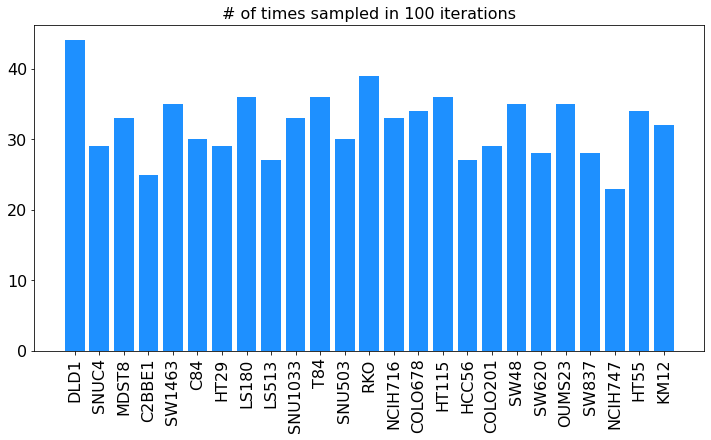

In [41]:
figsize(12,6)
bar(arange(1,26), array(list(dict(Counter(all_lines_1)).values())),  color='dodgerblue')
xticks(arange(1,26), [ x.split("_")[0]  for x in list(Counter(all_lines_1))], rotation=90, size=7)
yticks(size=16)
xticks(size=16)
title('# of times sampled in 100 iterations', size=16)

savefig("./figs/Num_times_each_COLON_cells_sampled_in_100_iterations.png", format="png", dpi=350, bbox_inches='tight')
plt.show()




In [42]:
# get the total count per cell line to get normed binary calls

In [43]:
from collections import Counter, defaultdict

counts = defaultdict(Counter)

for dd in binary_call_dict.values():
    for k, d in dd.items():
        counts[k].update(d)
        
total_binary_count_per_cellline_df=pd.DataFrame(counts).T.dropna()
#total_binary_count_per_cellline_df.to_csv("total_binary_call_COLON_avana_across_100x.txt", sep="\t")

In [44]:
total_binary_count_per_cellline_df_normalized=total_binary_count_per_cellline_df.copy()

for i in total_binary_count_per_cellline_df_normalized.dtypes.index:
    
    total_binary_count_per_cellline_df_normalized[i]= total_binary_count_per_cellline_df[i]/ Counter(all_lines_1)[i]


total_binary_count_per_cellline_df_normalized.to_csv("./total_binary_call_COLON_avana20q2_per_cell_line_normalized_per_num_chosen_100X.txt", sep="\t")




In [47]:
# we need to create a master table for total number of observations in 8 bootstrapped screens in 100 iterations

In [48]:
master_table=pd.DataFrame(index=bf_df.index, columns=range(0,100))

for i in tqdm(binary_call_dict.keys()):
    df_temp=pd.DataFrame(binary_call_dict[i]).T
    df_temp['total']=df_temp.sum(axis=1)
    for j in df_temp.index:
        master_table.loc[j][i]=df_temp.loc[j]['total']
    

100%|██████████| 100/100 [03:42<00:00,  2.23s/it]


In [49]:
master_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZYG11B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZYX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZZEF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
master_table.to_csv("JLOE_Master_total_hits_in8_100_iterations_bootstrapped_BF10_colorectal_avana20q2.txt", sep="\t")

In [51]:
master_table['mean']=master_table.mean(axis=1)
master_table.to_csv("JLOE_Master_total_hits_in8_100_iterations_bootstrapped_with_mean_BF10_colorectal_avana20q2.txt", sep="\t")

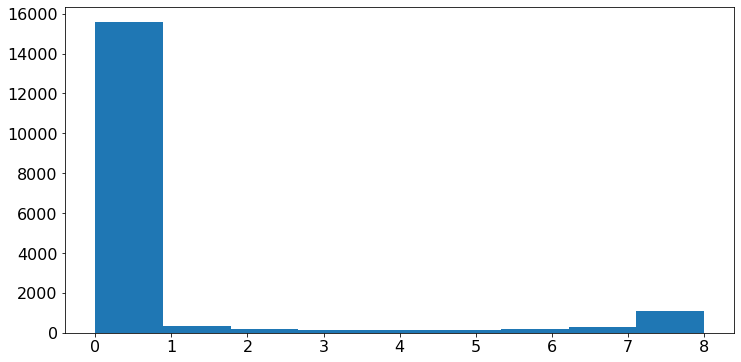

In [52]:
master_table['mean'].hist(bins=9)
grid(False)

In [53]:
master_table[0].value_counts().sort_index()

0    15420
1      408
2      217
3      155
4      149
5      134
6      237
7      345
8     1046
Name: 0, dtype: int64

In [54]:
bin_counts_100_iterations=dict() #make a dictionary of how many genes were hits in each bin 
for i in range(100):
    
    bin_counts_100_iterations[i]=dict()
    for j in arange(0,9):
        bin_counts_100_iterations[i][j]=master_table[i].value_counts().sort_index()[j]
    

In [55]:
hit_counts=pd.DataFrame(bin_counts_100_iterations)
hit_counts.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,15420,15415,15344,15445,15366,15298,15354,15399,15515,15543,...,15414,15556,15459,15336,15583,15539,15474,15485,15404,15485
1,408,418,453,407,439,441,439,462,416,402,...,429,403,401,492,370,392,444,406,427,404
2,217,197,218,226,227,224,238,194,210,179,...,223,195,192,222,180,183,233,211,212,207
3,155,140,156,180,150,184,177,159,148,128,...,176,141,162,175,143,149,143,149,166,153
4,149,136,140,138,130,136,120,129,139,159,...,148,121,135,143,118,143,157,145,131,154


In [56]:
hit_counts.to_csv("JLOE_Hit_counts_per_bin_colorectal_100_iterations_BF10_avana20q2.txt", sep="\t")

In [57]:
hit_counts.loc[0].mean(),hit_counts.loc[0].std() 

(15440.72, 73.14052891316118)

In [58]:
hit_counts['mean']=hit_counts.mean(axis=1)
hit_counts['STD']=hit_counts.std(axis=1)
hit_counts.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,mean,STD
0,15420,15415,15344,15445,15366,15298,15354,15399,15515,15543,...,15459,15336,15583,15539,15474,15485,15404,15485,15440.72,72.773907
1,408,418,453,407,439,441,439,462,416,402,...,401,492,370,392,444,406,427,404,432.56,31.257102
2,217,197,218,226,227,224,238,194,210,179,...,192,222,180,183,233,211,212,207,215.44,19.549588
3,155,140,156,180,150,184,177,159,148,128,...,162,175,143,149,143,149,166,153,158.25,16.367880
4,149,136,140,138,130,136,120,129,139,159,...,135,143,118,143,157,145,131,154,144.45,14.614633


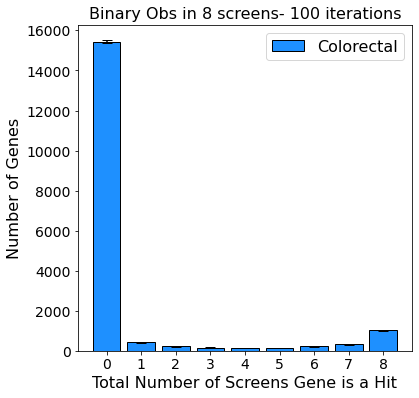

In [59]:
figsize(6,6)
plt.bar(np.arange(0,9),hit_counts['mean'].values, yerr=hit_counts['STD'].values, capsize=5,  color='dodgerblue',align='center', edgecolor='black', label='Colorectal')
xticks(arange(0,9))
title('Binary Obs in 8 screens- 100 iterations', size=16)
xlabel('Total Number of Screens Gene is a Hit', size=16)
xticks(size=14)
yticks(size=14)
ylabel('Number of Genes', size=16)
legend()

savefig("./figs/Colorectal_100_iterations_binaryobs_total_in8_inc_0_avana20q2_not_multi.png", format="png", dpi=350, bbox_inches='tight')
savefig("./figs/Colorectal_100_iterations_binaryobs_total_in8_inc_0_avana20q2_not_multi.pdf", format="pdf", dpi=350, bbox_inches='tight')
plt.show()

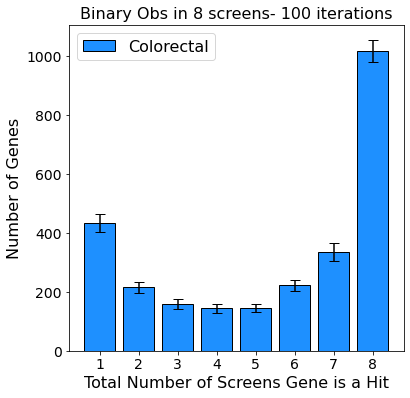

In [60]:
figsize(6,6)
plt.bar(np.arange(1,9),hit_counts.loc[1:9]['mean'].values, yerr=hit_counts.loc[1:9]['STD'].values, capsize=5,  color='dodgerblue',align='center', edgecolor='black',
       label='Colorectal')
xticks(arange(1,9))
title('Binary Obs in 8 screens- 100 iterations', size=16)
xlabel('Total Number of Screens Gene is a Hit', size=16)
xticks(size=14)
yticks(size=14)
ylabel('Number of Genes', size=16)
legend()

savefig("./figs/Colorectal_100_iterations_binaryobs_total_in8_exc_0_avana20q2_not_multi.png", format="png", dpi=350, bbox_inches='tight')
savefig("./figs/Colorectal_100_iterations_binaryobs_total_in8_exc_0_avana20q2_not_multi.pdf", format="pdf", dpi=350, bbox_inches='tight')
plt.show()

##  now we need to try to replicate the violin plot that we had created from the saturation modeling approach

### let's build a dictionary for the list of genes essential in num of screens

In [61]:
essentials_dict=dict() #get list of essentials per iteration per bin
for i in range(100):
    essentials_dict[i]=dict()
    for j in range(9):
        essentials_dict[i][j]=list(master_table[i][master_table[i]==j].index)

In [62]:
# so for each iteration and for each gene in iteration we need to see where the binary calls were 0 
#and for those screens we need to see the average BF 

In [63]:
avg_BF_when_binary_0=dict()
screens_binary_0=dict()
for i in range(100):
    avg_BF_when_binary_0[i]=dict()
    screens_binary_0[i]=dict()
    
    for j in master_table.index:
        screens_binary_0[i][j]=[k for k,v in binary_call_dict[i][j].items() if v == 0]
        

    for k in screens_binary_0[i].keys():
        avg_BF_when_binary_0[i][k]=gene_bf_dict_100[i][k].loc[screens_binary_0[i][k]].mean().values
    

In [64]:
avg_BF_when_binary_0_100_iterations_df= pd.DataFrame(avg_BF_when_binary_0)
for i in avg_BF_when_binary_0_100_iterations_df.dtypes.index:
    avg_BF_when_binary_0_100_iterations_df[i]=avg_BF_when_binary_0_100_iterations_df[i].str.get(0)
avg_BF_when_binary_0_100_iterations_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
A1BG,-19.349000,-16.966750,-21.390875,-21.272625,-20.697000,-21.011375,-22.078875,-22.016875,-17.023500,-21.098000,...,-17.710000,-22.15800,-20.158625,-20.205625,-16.77800,-23.448000,-22.684375,-19.949000,-19.601125,-26.875500
A1CF,-20.170750,-19.524000,-25.760000,-24.228875,-27.089500,-26.046750,-23.281375,-26.144375,-19.659750,-19.953375,...,-21.782000,-20.89575,-22.093250,-24.082375,-18.38525,-22.762750,-26.086250,-20.132500,-23.701875,-26.974125
A2M,-14.549625,-12.404375,-13.468250,-11.809500,-14.760250,-12.494375,-15.219500,-13.846625,-11.667375,-12.269000,...,-12.192000,-12.26325,-10.449875,-13.038750,-8.81550,-14.153375,-14.051375,-11.512500,-13.966375,-11.547625
A2ML1,-20.503500,-18.556000,-21.988500,-24.428250,-25.587000,-22.422500,-20.960000,-22.297125,-23.324000,-19.588000,...,-19.352125,-18.29550,-20.544875,-21.777250,-18.68425,-21.188375,-24.010000,-19.850625,-21.074875,-23.442250
A3GALT2,-22.327875,-19.180625,-26.844000,-22.618125,-26.194375,-23.052625,-25.701000,-26.906000,-20.849625,-22.828375,...,-20.645250,-25.86650,-22.105125,-22.533375,-19.20875,-30.611625,-29.544625,-23.682500,-24.977250,-34.129500


In [65]:
avg_BF_when_binary_0_100_iterations_df.to_csv("./JLOE_Average_BF_when_binary_is_0_in_100_iterations_genelevel_BF10_colorectal_avana20q2.txt", sep="\t")

## now for each bin, plot the mean BF in non hit screens

In [66]:
per_bin_avg_BF_when_binary_0=dict()
per_bin_avg_BF_when_binary_0_mean=dict()

for t in range(100):
    per_bin_avg_BF_when_binary_0_mean[t]=dict()
    per_bin_avg_BF_when_binary_0[t]=dict()

    for i in arange(1,9):
        essentials_in_bin=essentials_dict[t][i] # get the list of essentials in each bin, we don't need 0 here

        list_of_BF_in_non=list()
        
        for j in essentials_in_bin:

            list_of_BF_in_non.append(avg_BF_when_binary_0[t][j])

            per_bin_avg_BF_when_binary_0_mean[t][i]=(array(list_of_BF_in_non)).mean()
            per_bin_avg_BF_when_binary_0[t][i]=(list_of_BF_in_non)
   

In [67]:

MEAN_in100_per_bin_avg_BF_when_binary_0=dict() # will have mean BF in each bin for each 100 iteration
for i in range(100):
    
    MEAN_in100_per_bin_avg_BF_when_binary_0[i]=dict()
    df_vio= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in per_bin_avg_BF_when_binary_0[i].items() ]))
    for m in df_vio.dtypes.index:
        df_vio[m]=df_vio[m].str.get(0)
    
    
    mean_in_bin=dict()
    for k in arange(1,9):
        mean_in_bin[k]=df_vio.loc[:,k].mean(axis=0)
        
        MEAN_in100_per_bin_avg_BF_when_binary_0[i]=mean_in_bin
      


In [68]:
#this has the bin level avg BF of hits in screens where it is not a hit (averaged)
bin_level_avg_BF_when_binary_0 = pd.DataFrame(MEAN_in100_per_bin_avg_BF_when_binary_0)

In [69]:
bin_level_avg_BF_when_binary_0

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,-10.580599,-9.413445,-12.592634,-11.364717,-11.600895,-11.703876,-12.442972,-11.919642,-8.177453,-9.096355,...,-9.885464,-10.137633,-10.181902,-11.086459,-7.394344,-9.964403,-11.960857,-10.254264,-11.117279,-12.864969
2,-8.567050,-7.414195,-10.145975,-9.208962,-9.578266,-9.509717,-10.014803,-9.859787,-6.977767,-8.094058,...,-7.350883,-7.896332,-8.645595,-9.294871,-5.582437,-9.086716,-10.023127,-8.766022,-8.171420,-11.078672
3,-7.949257,-6.375947,-10.313635,-9.318431,-9.507884,-8.495841,-9.478541,-10.241561,-6.811265,-7.325686,...,-6.631632,-7.963706,-7.990394,-9.105718,-5.683305,-8.168432,-10.115573,-7.990344,-7.677251,-10.121014
4,-8.828896,-7.348904,-10.392396,-10.612797,-8.396810,-9.162846,-9.979612,-9.122244,-7.032169,-8.241365,...,-7.510493,-7.820705,-8.732376,-8.508316,-5.920087,-9.205346,-9.659807,-8.602147,-8.144057,-11.444443
5,-9.154950,-6.801745,-10.707089,-10.844193,-9.588194,-8.710486,-10.387475,-11.106553,-7.963944,-9.036123,...,-6.979906,-8.229266,-9.555831,-9.541960,-5.555637,-9.720314,-10.785035,-10.702901,-8.157925,-10.354276
6,-9.212599,-8.951264,-10.364576,-10.890200,-10.094391,-9.182992,-10.082342,-10.278681,-8.349987,-8.633530,...,-8.024267,-8.944976,-9.625808,-9.320175,-6.919716,-9.719023,-9.797730,-9.070308,-8.717566,-10.213320
7,-8.610171,-7.925009,-9.000997,-8.861709,-9.231806,-8.000247,-9.066828,-8.971425,-8.576821,-8.347457,...,-7.587087,-8.128275,-8.875749,-8.061622,-6.867289,-8.495595,-8.602325,-8.534518,-7.745441,-8.996140
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
bin_level_avg_BF_when_binary_0.to_csv("./JLOE_Average_BF_when_binary_is_0_in_100_iterations_binlevel_BF10_colorectal_avana20q2.txt", sep="\t")




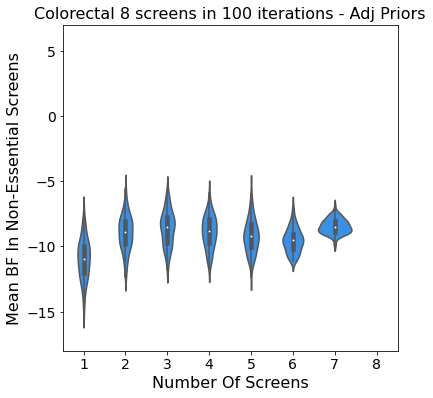

In [71]:
import seaborn as sns
figsize(6,6)
sns.violinplot(x='variable', y='value', data=bin_level_avg_BF_when_binary_0.T.melt(), align='center', color='dodgerblue')


xticks(size=14)
yticks(size=14)
ylim(-18,7)
title('Colorectal 8 screens in 100 iterations - JLOE', size=16)
xlabel('Number Of Screens', size=16)
ylabel('Mean BF In Non-Essential Screens', size=16)
savefig("./figs/Colorectal_8_screens_100_iterations_meanbf_noness_violin_wide_avana20q2_not_multi.png", format="png", dpi=350, bbox_inches='tight')
savefig("./figs/Colorectal_8_screens_100_iterations_meanbf_noness_violin_wide_avana20q2_not_multi.pdf", format="pdf", dpi=350, bbox_inches='tight')
plt.show()